In [15]:
import os
from tensorboard.backend.event_processing import event_accumulator
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np


In [16]:
def extract_data(logdir):
    # load tensorBoard data
    ea = event_accumulator.EventAccumulator(logdir)
    ea.Reload()
    
    # get all scalar tags
    tags = ea.Tags()['scalars']
    
    # initialize dictionary to hold data for each tag
    data = {tag: [] for tag in tags}
    
    # extract data for each tag
    for tag in tags:
        events = ea.Scalars(tag)
        data[tag] = [(e.wall_time, e.value) for e in events]
        
    return data, tags

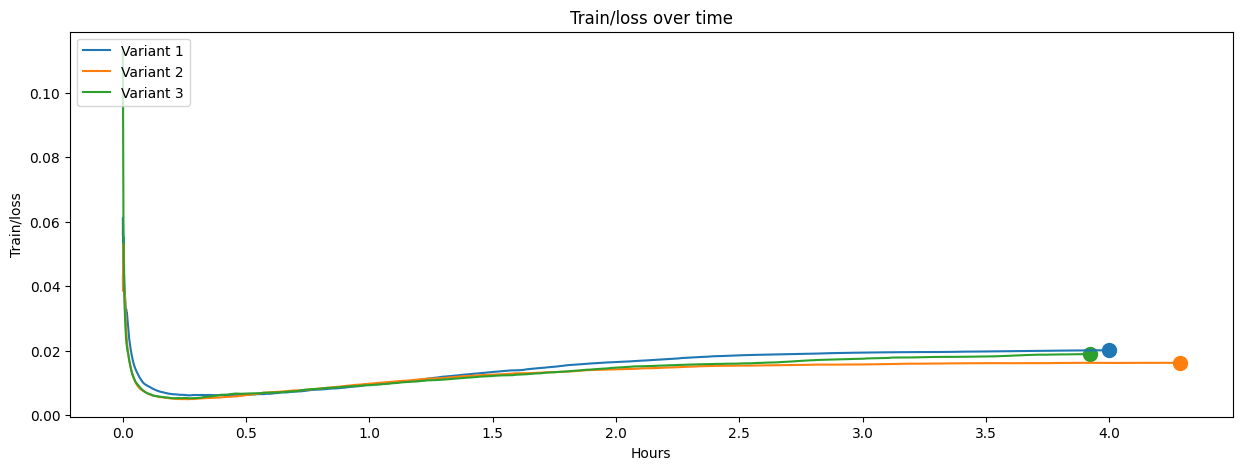

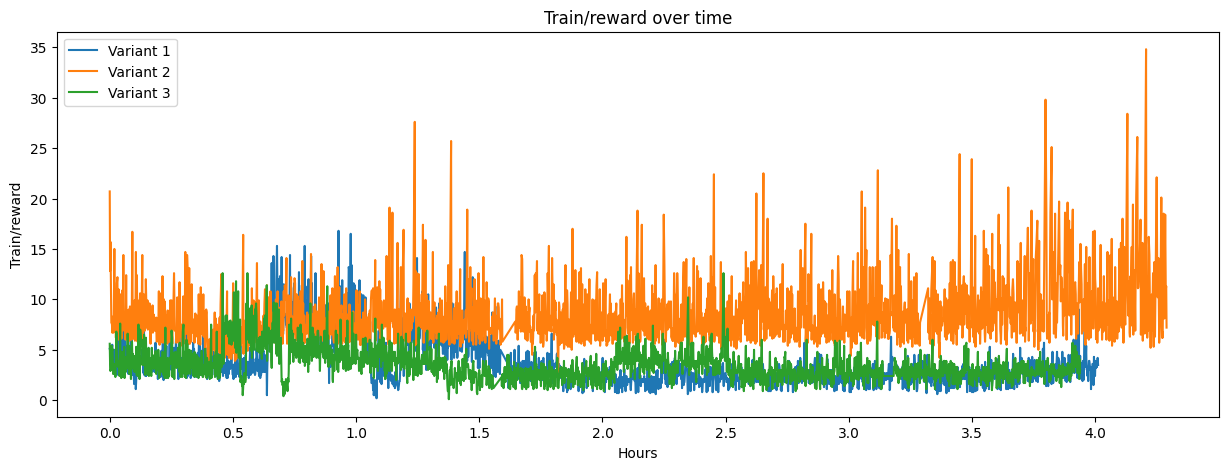

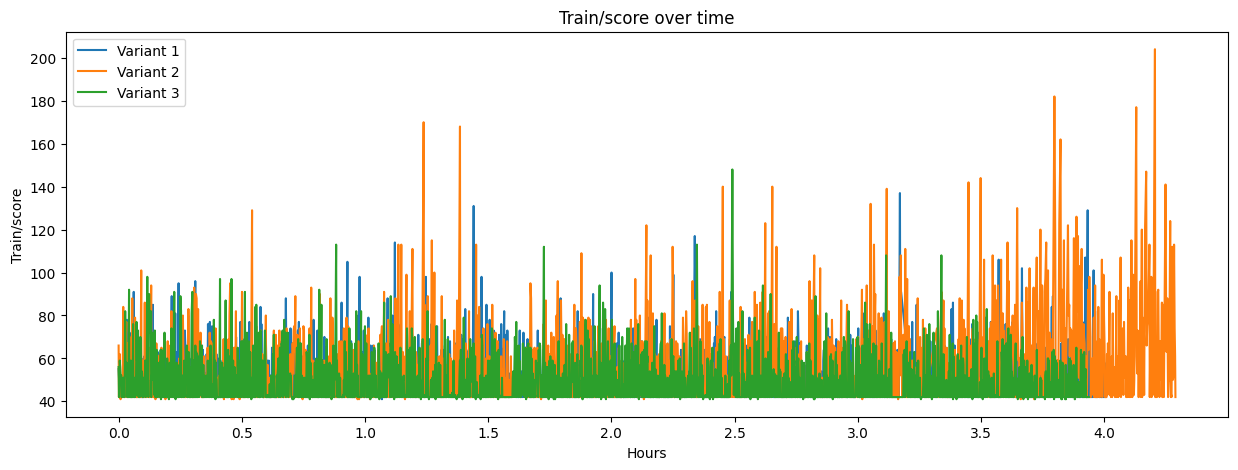

In [20]:
def plot_multiple_runs(dirs, tag, labels, add_marker=False):
    plt.figure(figsize=(15, 5))
    
    # iterate over each directory and label
    for logdir, label in zip(dirs, labels):
        data, tags = extract_data(logdir)
        
        # check if the tag exists and plot the data
        if tag in tags:
            times, values = zip(*data[tag])
            # convert times from epoch to hours since the first timestamp
            start_time = times[0]
            hours = [(t - start_time) / 3600.0 for t in times]
            sns.lineplot(x=hours, y=values, label=label)
            if add_marker:
                plt.scatter(hours[-1], values[-1], s=100)  # add a point at the end of the line
        else:
            print(f"Tag '{tag}' not found in {logdir}")
    
    # set plot title and labels
    plt.title(f'{tag} over time')
    plt.xlabel('Hours')
    plt.ylabel(tag)
    plt.legend(loc='upper left')  
    
    max_hours = max(hours)
    plt.xticks(np.arange(0, max_hours + 0.5, 0.5))

    plt.show()


# directories of tensorBoard log files
logdirs = [
    '/runs/run_config1_train/events.out.tfevents.1718356719.DESKTOP-QD7MSDE.7644.0',
    '/runs/run_config2_train/events.out.tfevents.1718355325.MacBook-Air-von-Nik.fritz.box.16796.0',
    '/runs/run_config3_train/events.out.tfevents.1718188387.DESKTOP-QD7MSDE.22880.0'
]

# labels for different runs
labels = ['Variant 1', 'Variant 2', 'Variant 3']

# tags to be plotted
tags_to_plot = ['Train/loss', 'Train/reward', 'Train/score']

# plot data for each tag
for tag in tags_to_plot:
    plot_multiple_runs(logdirs, tag, labels, add_marker=(tag == 'Train/loss'))